In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.optimizers import SGD, RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget "https://github.com/Reghunaath/Indian_food_dataset/raw/master/archive%20(1).zip"

--2021-03-25 16:44:27--  https://github.com/Reghunaath/Indian_food_dataset/raw/master/archive%20(1).zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Reghunaath/Indian_food_dataset/master/archive%20(1).zip [following]
--2021-03-25 16:44:28--  https://raw.githubusercontent.com/Reghunaath/Indian_food_dataset/master/archive%20(1).zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25693584 (25M) [application/zip]
Saving to: ‘archive (1).zip’

archive (1).zip     100%[===================>]  24.50M  80.5MB/s    in 0.3s    

2021-03-25 16:44:29 (80.5 MB/s) - ‘archive (1).zip’ saved [25693584/256

In [ ]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [ ]:
X_train = train.iloc[:, : -2]
y_train = train.iloc[:, 562:563]
X_test = test.iloc[:, : -2]
y_test = test.iloc[:, 562:563]
label_encoder = LabelEncoder()
integer_y_train = label_encoder.fit_transform(y_train)
integer_y_test = label_encoder.transform(y_test)
one_hot_y_train = to_categorical(integer_y_train, 6)
one_hot_y_test = to_categorical(integer_y_test, 6)
X_train = np.expand_dims(X_train,axis=1)
X_test = np.expand_dims(X_test,axis=1)
# print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))
# one_hot_y_test
# X_trai/n.shape

((7352, 1, 561), (2947, 1, 561), (7352, 1), (2947, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, 561)))
model.add(Conv1D(128, kernel_size=1))
model.add(Dropout(0.2))
# model.add(Conv1D(64, kernel_size=1))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.35))
model.add(Dense(64, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.967):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(96.7))   
          self.model.stop_training = True
callback = myCallback()
filepath = 'content/checkpoint'
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_79 (Conv1D)           (None, 1, 64)             35968     
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 1, 128)            8320      
_________________________________________________________________
dropout_99 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 1, 64)             8256      
_________________________________________________________________
dropout_100 (Dropout)        (None, 1, 64)             0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)             

In [ ]:
history = model.fit(X_train, one_hot_y_train, batch_size=4, epochs=100, verbose=1, callbacks = [callback, checkpoint], validation_data=(X_test, one_hot_y_test))

Epoch 1/100
1838/1838 [==============================] - 7s 4ms/step - loss: 0.7248 - accuracy: 0.6900 - val_loss: 0.4279 - val_accuracy: 0.8571

Epoch 00001: val_accuracy improved from -inf to 0.85714, saving model to content/checkpoint
INFO:tensorflow:Assets written to: content/checkpoint/assets
Epoch 2/100
1838/1838 [==============================] - 6s 3ms/step - loss: 0.2719 - accuracy: 0.9159 - val_loss: 0.5202 - val_accuracy: 0.9070

Epoch 00002: val_accuracy improved from 0.85714 to 0.90702, saving model to content/checkpoint
INFO:tensorflow:Assets written to: content/checkpoint/assets
Epoch 3/100
1838/1838 [==============================] - 6s 4ms/step - loss: 0.2350 - accuracy: 0.9400 - val_loss: 0.3164 - val_accuracy: 0.9226

Epoch 00003: val_accuracy improved from 0.90702 to 0.92263, saving model to content/checkpoint
INFO:tensorflow:Assets written to: content/checkpoint/assets
Epoch 4/100
1838/1838 [==============================] - 6s 3ms/step - loss: 0.2192 - accuracy: 0

In [ ]:
new_model = keras.models.load_model("/content/drive/MyDrive/checkpoint")

In [ ]:
new_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 1, 64)             35968     
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 1, 128)            8320      
_________________________________________________________________
dropout_106 (Dropout)        (None, 1, 128)            0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_107 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 64)              

In [ ]:
new_model.evaluate(X_test, one_hot_y_test)

93/93 [==============================] - 30s 2ms/step - loss: 1.0872 - accuracy: 0.9613


[1.0871795415878296, 0.9613165855407715]

In [ ]:
from sklearn.metrics import classification_report
y_pred = new_model.predict(X_test)
# y_pred.shape
classification_report(integer_y_test, np.argmax(y_pred, axis = 1), output_dict=True)

{'0': {'f1-score': 0.996282527881041,
  'precision': 0.9944341372912802,
  'recall': 0.9981378026070763,
  'support': 537},
 '1': {'f1-score': 0.92806484295846,
  'precision': 0.9233870967741935,
  'recall': 0.9327902240325866,
  'support': 491},
 '2': {'f1-score': 0.9356060606060606,
  'precision': 0.9427480916030534,
  'recall': 0.9285714285714286,
  'support': 532},
 '3': {'f1-score': 0.9718309859154929,
  'precision': 0.9698795180722891,
  'recall': 0.9737903225806451,
  'support': 496},
 '4': {'f1-score': 0.9736842105263157,
  'precision': 0.9783653846153846,
  'recall': 0.969047619047619,
  'support': 420},
 '5': {'f1-score': 0.9629629629629631,
  'precision': 0.959915611814346,
  'recall': 0.9660297239915074,
  'support': 471},
 'accuracy': 0.9613165931455717,
 'macro avg': {'f1-score': 0.9614052651417221,
  'precision': 0.961454973361758,
  'recall': 0.9613945201384771,
  'support': 2947},
 'weighted avg': {'f1-score': 0.9613020266704579,
  'precision': 0.961326819355699,
  're

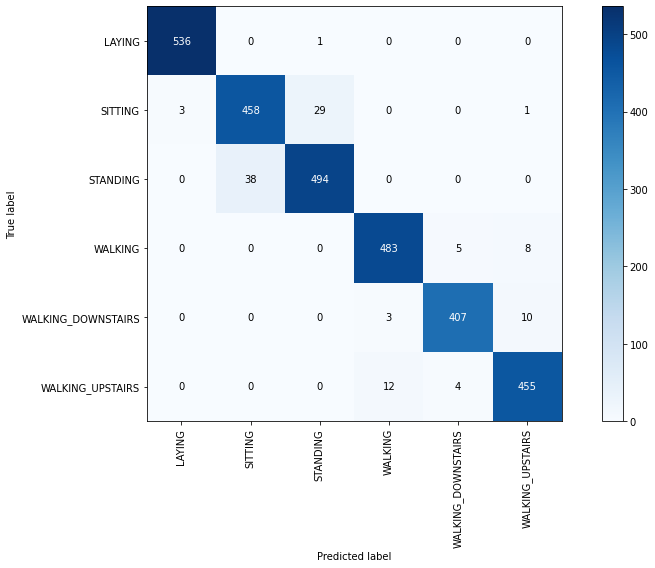

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
integer_y_pred = np.argmax(y_pred, axis = 1)
string_y_pred = label_encoder.inverse_transform(integer_y_pred)
cm = confusion_matrix(y_test,string_y_pred)
plot_confusion_matrix(cm, np.unique(string_y_pred)) 